In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/card_transdata.csv")

# gaining basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Data cleaning and Preprocessing

In [92]:
# converting float type binary features to integer type
df[['used_pin_number','fraud','online_order','repeat_retailer','used_chip']]=df[['used_pin_number','fraud','online_order','repeat_retailer','used_chip']].astype(int)


# Data Visualisation

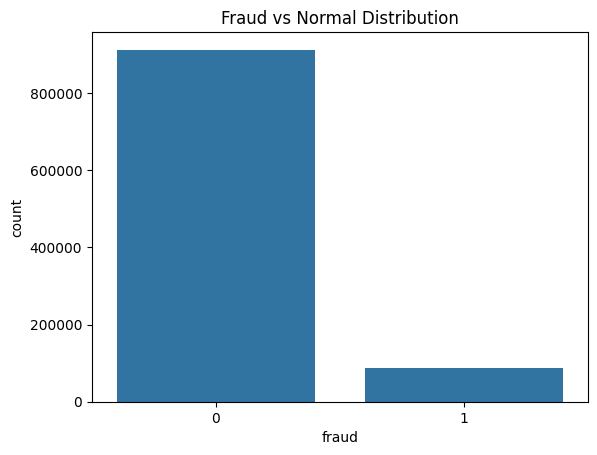

In [80]:
# Fraudulent transaction distribution
sns.countplot(x="fraud", data=df)
plt.title("Fraud vs Normal Distribution")
plt.show()


the above countplot clearly shows that the Dataset is Extremely unbalanced

- 1: Fraud
- 0: Normal

In [104]:
fraud_to_normal_ratio=((df['fraud'] == 1).sum()/(df['fraud'] == 0).sum())
print("Number of frauds",df['fraud'].sum())
print("Number of frauds",(df['fraud']==0).count())
print(f"{fraud_to_normal_ratio*100} %")

Number of frauds 87403
Number of frauds 1000000
9.577392868922427 %


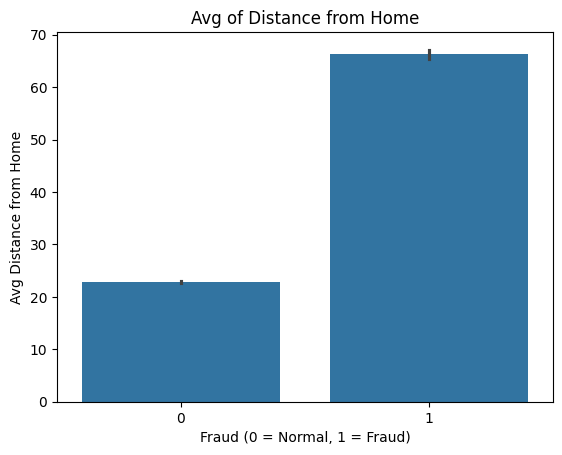

In [82]:
sns.barplot(x='fraud', y='distance_from_home', data=df)
plt.title("Avg of Distance from Home")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Avg Distance from Home")
plt.show()

This shows that fraud transactions tend to happen far away from home location on average

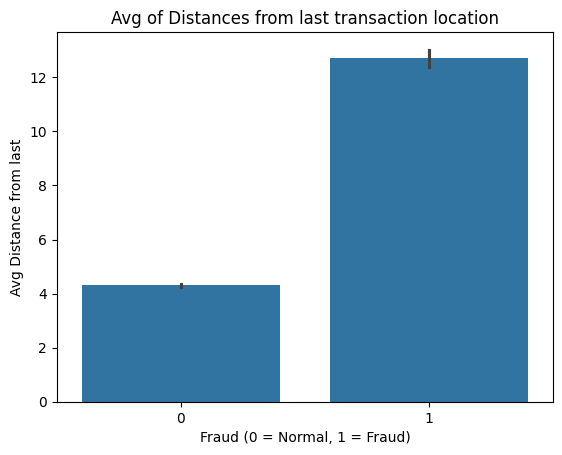

In [83]:
sns.barplot(x='fraud', y='distance_from_last_transaction', data=df)
plt.title("Avg of Distances from last transaction location")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Avg Distance from last")
plt.show()

this shows that fraud transactions tend to happen farther from the last normal transaction location

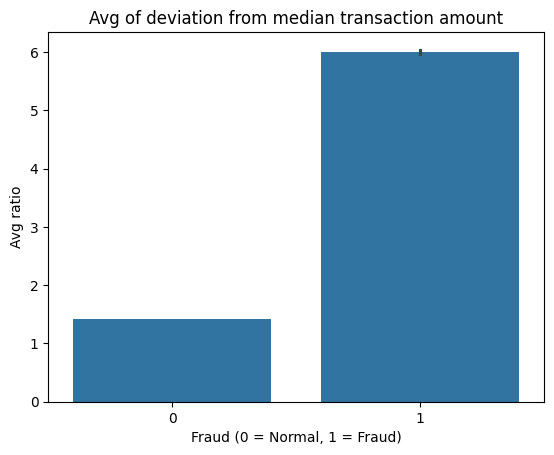

In [84]:
sns.barplot(x='fraud', y='ratio_to_median_purchase_price', data=df)
plt.title("Avg of deviation from median transaction amount")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Avg ratio")
plt.show()

This plot shows that fraudulent transactions amounts tend to be higher than normal ones

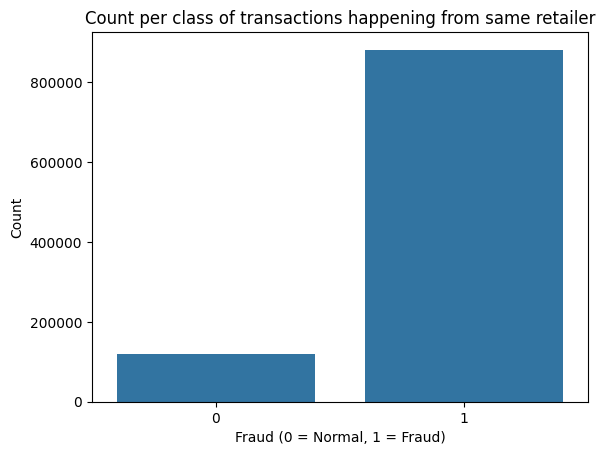

In [85]:
sns.countplot(x='repeat_retailer',data=df)
plt.title("Count per class of transactions happening from same retailer")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

this countplot shows that fraudulent transactions tend to happen more from the same retailer

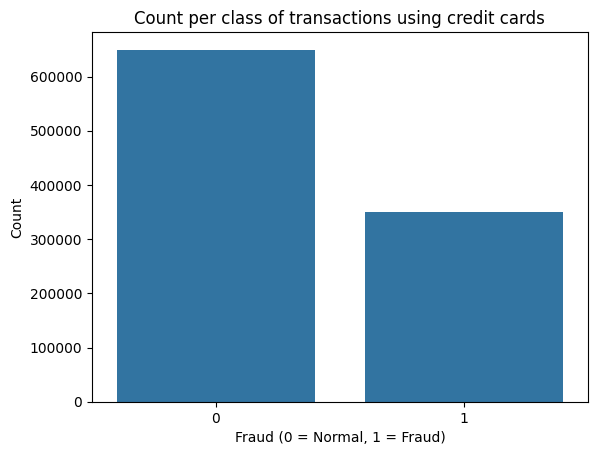

In [86]:
sns.countplot(x='used_chip',data=df)
plt.title("Count per class of transactions using credit cards")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

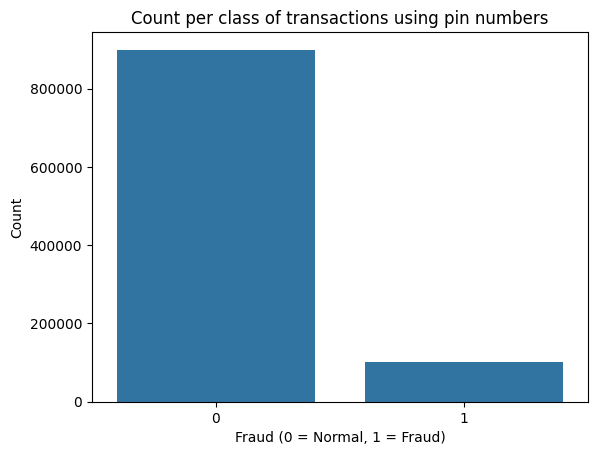

In [105]:
sns.countplot(x='used_pin_number',data=df)
plt.title("Count per class of transactions using pin numbers")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

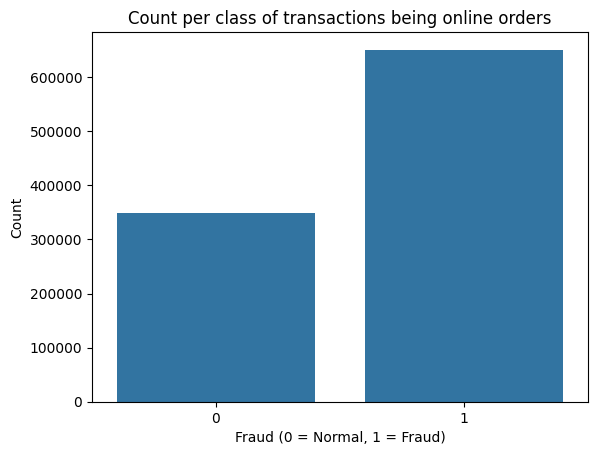

In [88]:
sns.countplot(x='online_order',data=df)
plt.title("Count per class of transactions being online orders")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

this shows that fraudulent transactions tend to utilise online ordering methods more

In [89]:
x = df.query("fraud == 1 and used_pin_number == 1 and used_chip == 1")
len(x)

card_pin_fraud_ratio=len(x)/(df['fraud'] == 1).sum()
print(card_pin_fraud_ratio*100,"%")

0.010297129389151402 %


this result shows that most fraudulent transactions dont use card+pin 

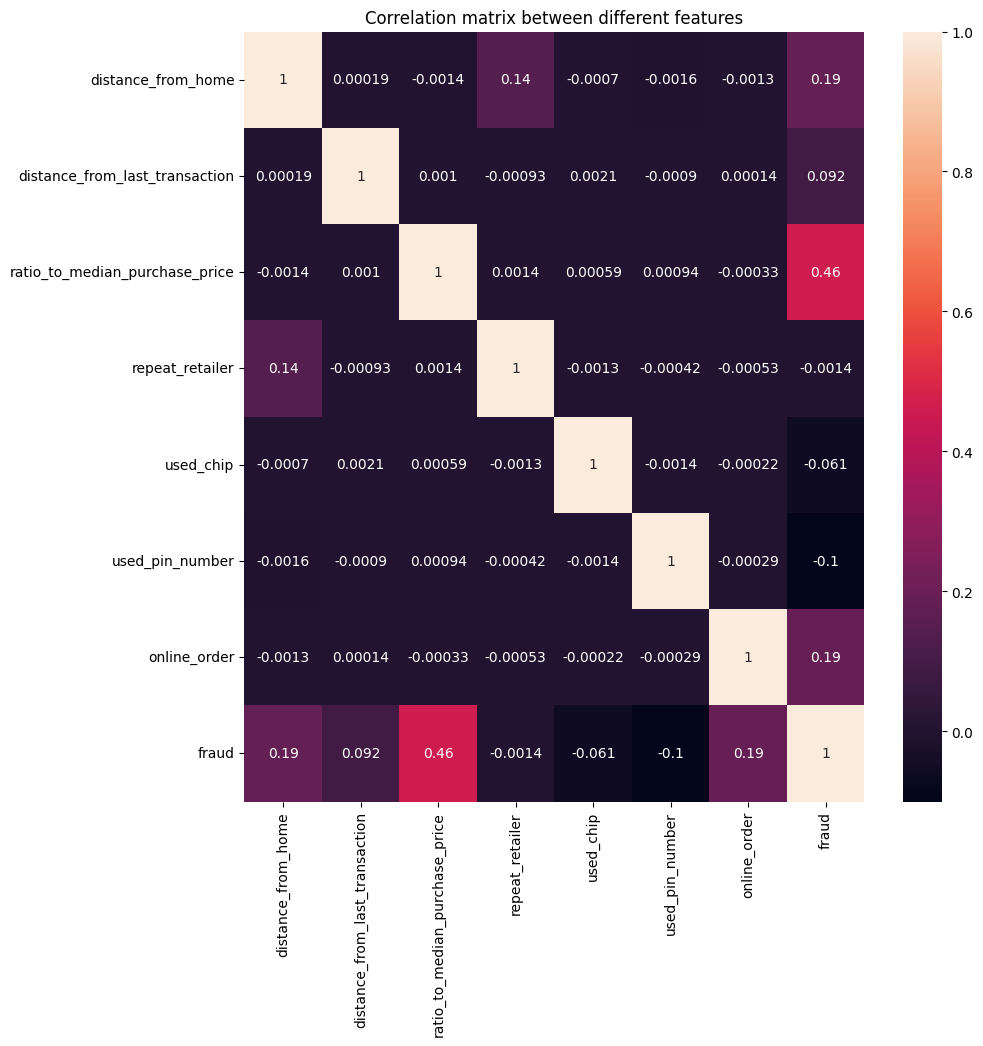

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.title("Correlation matrix between different features")
plt.show()